In [4]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from joblib import dump

In [2]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/Salary_Data.csv"
df = pd.read_csv(url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
px.scatter(df, x="YearsExperience", y="Salary")

training and saving the model

In [15]:
X = df[["YearsExperience"]]
y = df[["Salary"]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
ypred = model.predict(X)
print(score*100)
dump(model,'../../models/salary_reg.joblib')

90.24461774180497


['../../models/salary_reg.joblib']

model visualization

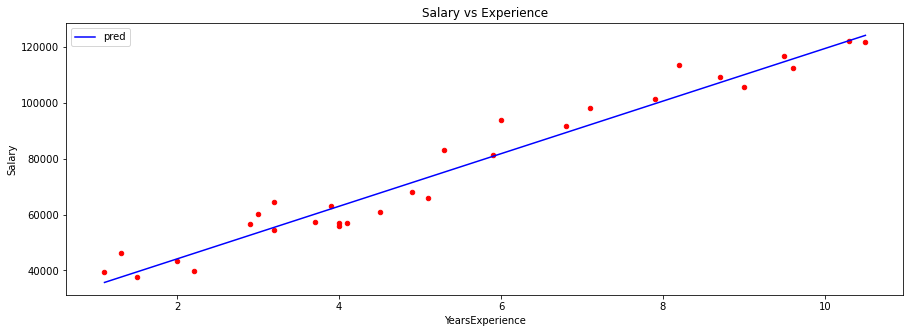

In [11]:
df['pred'] = ypred
ax = df.plot(kind='scatter',x='YearsExperience',y='Salary',color='red',figsize=(15,5),title='Salary vs Experience')
df.plot(kind='line',x='YearsExperience',y='pred',color='blue',ax=ax)
plt.show()